In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
# %cd ../DDI_model/ddi_model/
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from ddi_model.data_load import *
from ddi_model.model import DDI_model

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import tensorflow as tf
from tensorflow.compat.v1.keras import backend as K

import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.compat.v1.Session(config=config)
K.set_session(session)

In [4]:
np.random.seed(3)
tf.compat.v1.random.set_random_seed(3)

## DDI model 

In [5]:
ddi_model = DDI_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Load data

In [6]:
train_data = load_train_example()
ts_exp = load_exp()

Including reverse pairs:  (38520, 4)


### Model training

In [7]:
ddi_model.train(train_data=train_data, exp_df=ts_exp, split_frac=0.1, sampling_size=1, model_save_path='./DAS_Storage3/', model_name='test')

0  Sample =======
Cross validation train, test dataset size:  (34668, 3) (3852, 3)


/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/model.py:147: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.model.fit_generator(generator=cv_train_gen, steps_per_epoch=steps_per_epoch, validation_data=cv_test_gen, \
/home/ahmedh/.local/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/model.py:150: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  cv_test_pred_y = self.model.predict_generator(generator=cv_test_gen)
/home/ahmedh/.local/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Mod

AUC: 0.532, AUPR: 0.699


In [8]:
print(train_data.iloc[100:130,:3])

print()

     drug1    drug2  SE
100   2955   156419   5
101   3958     4885   5
102   3640     3750   5
103   3345  5311181   5
104   1983     2187   5
105   5090     5372   5
106   2656     4473   5
107   4635    54808   5
108    937     5090   5
109   2895     3154   5
110   2022     3793   5
111   2764     2812   5
112   1117    59708   5
113   3348     4499   5
114   2764     3878   5
115   3345     4894   5
116   5002     5038   5
117  60184   176870   5
118   2162     2244   5
119   5095    27661   5
120   4946   110635   6
121   2909    77992   6
122   3365    54374   6
123   2764    60854   6
124   2171    83786   6
125   3793   216326   6
126   2786    24486   6
127   4583    62924   6
128   3075     3652   6
129   3143     5358   6



### Load model and Evaluation

/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:207: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_test = model.predict_generator(generator=test_gen)


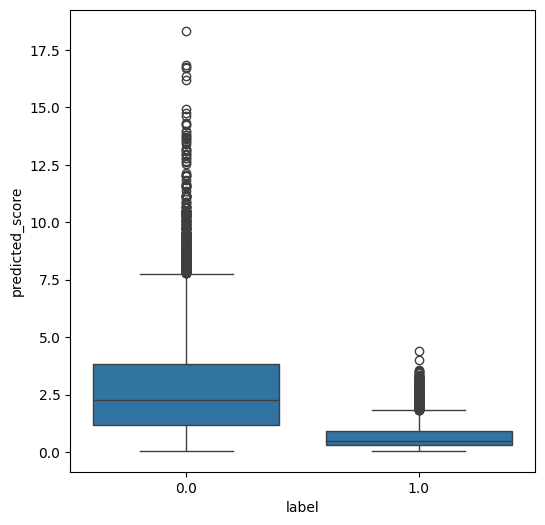

/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  se_performance = pd.concat([se_performance, temp_df], axis=0)
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:186: RuntimeWarning: invalid value encountered in scalar divide
  'SN':tp/(tp+fn), 'SP':tn/(tn+fp), 'PR':tp/(tp+fp), 'AUC':auc, 'AUPR':aupr}, index=[0])
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:186: RuntimeWarning: invalid value encountered in scalar divide
  'SN':tp/(tp+fn), 'SP':tn/(tn+fp), 'PR':tp/(tp+fp), 'AUC':auc, 'AUPR':aupr}, index=[0])
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:207: UserWarnin

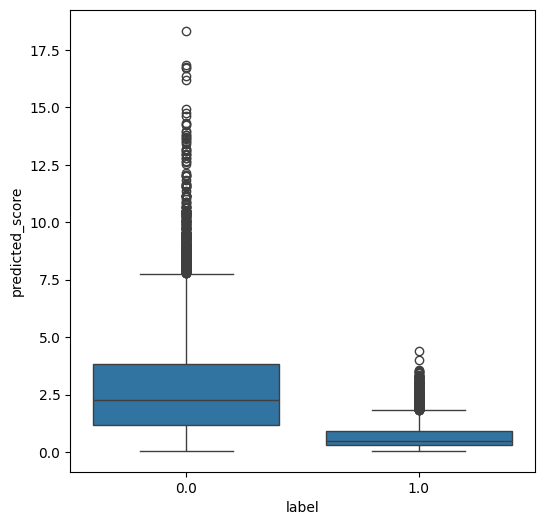

/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  se_performance = pd.concat([se_performance, temp_df], axis=0)
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:186: RuntimeWarning: invalid value encountered in scalar divide
  'SN':tp/(tp+fn), 'SP':tn/(tn+fp), 'PR':tp/(tp+fp), 'AUC':auc, 'AUPR':aupr}, index=[0])
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:186: RuntimeWarning: invalid value encountered in scalar divide
  'SN':tp/(tp+fn), 'SP':tn/(tn+fp), 'PR':tp/(tp+fp), 'AUC':auc, 'AUPR':aupr}, index=[0])


Test set predicted === 


/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:249: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  se_performance = pd.concat([se_performance, temp_df], axis=0)
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:248: RuntimeWarning: invalid value encountered in scalar divide
  'SN':tp/(tp+fn), 'SP':tn/(tn+fp), 'PR':tp/(tp+fp), 'AUC':auc, 'AUPR':aupr}, index=[0])
/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/DeSIDE_DDI_functions.py:248: RuntimeWarning: invalid value encountered in scalar divide
  'SN':tp/(tp+fn), 'SP':tn/(tn+fp), 'PR':tp/(tp+fp), 'AUC':auc, 'AUPR':aupr}, index=[0])


AUC: 0.885, AUPR: 0.916


In [9]:
# load pretrained model weights
ddi_model.load_model(model_load_path='./trained_model/', model_name='ddi_model_weights.h5', threshold_name='ddi_model_threshold.csv')

# test model evaluation with example data
prediced_label, performance = ddi_model.test(test_x=train_data.iloc[:,:3], test_y=train_data.iloc[:,3], exp_df=ts_exp)

In [10]:
drug_info = pd.read_csv('./data/twosides_drug_info.csv', index_col=0)
drug_info_dict = dict(zip(drug_info.pubchemID, drug_info.name))
side_effect_info = pd.read_csv('./data/twosides_side_effect_info.csv', index_col=0)
side_effect_dict = dict(zip(side_effect_info.SE_map, side_effect_info['Side Effect Name']))

se_UMLS_id = dict(zip(side_effect_info.SE_id, side_effect_info.SE_map))

In [11]:
print(side_effect_info)

        SE_id  SE_map Polypharmacy Side Effect         Side Effect Name
0    C0000731       0                 C0000731     abdominal distension
1    C0000737       1                 C0000737           abdominal pain
2    C0000768       2                 C0000768             birth defect
3    C0000786       3                 C0000786     abortion spontaneous
4    C0000833       4                 C0000833                  abscess
..        ...     ...                      ...                      ...
958  C1510475     958                 C1510475           diverticulosis
959  C1527336     959                 C1527336        Sjogrens syndrome
960  C1527344     960                 C1527344                dysphonia
961  C1527407     961                 C1527407   eosinophilic pneumonia
962  C1621958     962                 C1621958  glioblastoma multiforme

[963 rows x 4 columns]


In [12]:
drug1_cid = 3384 #@param {type:"integer"}
drug2_cid = 3086258 #@param {type:"integer"}
side_effect_UMLS_CUI = "C0001546" #@param {type:"string"}

try:
  side_effect_type = se_UMLS_id[side_effect_UMLS_CUI]
except:
  print('Side effect type not exist in TWOSIDES')
  raise Exception()

temp_df = pd.DataFrame({'drug1':drug1_cid, 'drug2':drug2_cid, 'SE':side_effect_type}, index=[0])

ts_drug_list = ts_exp.pubchem.values.tolist()
if (temp_df.drug1.values not in ts_drug_list) | (temp_df.drug2.values not in ts_drug_list):
  print('Drug cannot be found')

else:
  predicted_label = ddi_model.predict(temp_df, exp_df=ts_exp)

  print('Drug 1: ', drug_info_dict[drug1_cid], ', Drug 2: ', drug_info_dict[drug2_cid])
  print('Side effect name: ', side_effect_dict[side_effect_type])
  print('Predicted label: ', predicted_label.predicted_label[0])
  print('Predicted score: ', predicted_label.predicted_score[0])

Drug 1:  fluorometholone , Drug 2:  porfimer sodium
Side effect name:  adjustment disorder
Predicted label:  0
Predicted score:  3.394589


/media/ahmedh/General/My projects/DeSIDE-DDI/ddi_model/model.py:185: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_y = self.model.predict_generator(generator=test_gen)
